In [1]:
library(Seurat)
library(Matrix)
library(SeuratWrappers)
library(glmGamPoi)
library(sctransform)

Attaching SeuratObject



In [3]:
expr <- readMM('../data/pbmc_covid19/matrix.mtx')
rownames(expr) <- read.csv('../data/pbmc_covid19/features.tsv')$x
colnames(expr) <- read.csv('../data/pbmc_covid19/barcodes.tsv')$x
pbmc <- CreateSeuratObject(expr)
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method='vst', nfeatures=3000)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
#pbmc <- CellCycleScoring(pbmc, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
#pbmc <- ScaleData(pbmc, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(pbmc))
#pbmc <- ScaleData(pbmc, features = rownames(pbmc))

In [28]:
pbmc$Donor <- read.csv('../data/pbmc_covid19/meta.csv', row.names=1)$Donor
pbmc$celltype <- read.csv('../data/pbmc_covid19/meta.csv', row.names=1)$cell.type.fine

In [27]:
colnames(read.csv('../data/pbmc_covid19/meta.csv', row.names=1))

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "percent.mt"      
 [5] "percent.rps"      "percent.rpl"      "percent.rrna"     "nCount_SCT"      
 [9] "nFeature_SCT"     "SCT_snn_res.1"    "seurat_clusters"  "singler"         
[13] "Admission.level"  "cell.type.fine"   "cell.type.coarse" "cell.type"       
[17] "IFN1"             "HLA1"             "Donor.orig"       "Donor.full"      
[21] "Donor"            "Status"           "Sex"              "DPS"             
[25] "DTF"              "Admission"        "Ventilated"       "S.Score"         
[29] "G2M.Score"        "Phase"            "old.ident"

# PCA

In [3]:
pbmc_pca <- RunPCA(pbmc)

PC_ 1 
Positive:  SYNE2, TRBC2, SYNE1, GNLY, CCL5, PRF1, FGFBP2, GZMH, GZMA, GZMB 
	   IL2RB, IL7R, MYBL1, CD3D, SPTBN1, TRAC, SPON2, TCF7, ABLIM1, CD8A 
	   IL32, CD3G, KLRB1, TRGC2, PRSS23, LTB, TIGIT, BCL2, TRIB2, KLRF1 
Negative:  FCN1, LYZ, NCF2, AIF1, CYBB, CST3, S100A9, MNDA, CTSS, VCAN 
	   FGL2, SERPINA1, MPEG1, TNFAIP2, S100A8, PSAP, LST1, KLF4, FOS, CFP 
	   GRN, TYMP, TGFBI, LILRB2, COTL1, CD14, TKT, DUSP6, CPVL, KCTD12 
PC_ 2 
Positive:  MS4A1, CD79A, IGHM, BANK1, PAX5, RALGPS2, HLA-DRA, CD22, CD74, FAM129C 
	   CD79B, IGHD, FCRL1, SWAP70, CD19, FCRLA, TCF4, HLA-DQA1, HLA-DRB1, LINC00926 
	   WDFY4, HLA-DOA, SPIB, P2RX5, HLA-DPB1, IGLC3, HLA-DPA1, TCL1A, FCRL2, BCL11A 
Negative:  PRF1, GNLY, CCL5, FCGR3A, SYNE1, FGFBP2, SYNE2, GZMA, GZMH, GZMB 
	   IL2RB, SPON2, ANXA1, CX3CR1, SRGN, LCP1, TYROBP, MYBL1, FCGR3B, S100A4 
	   PRSS23, AOAH, KLRF1, SLAMF7, KLRB1, SAMHD1, TNFRSF1B, NCAM1, SH2D1B, TRDC 
PC_ 3 
Positive:  IL7R, S100A8, VCAN, CD14, S100A12, TCF7, S100A9, SELL, MS4A

In [4]:
write.csv(Embeddings(pbmc_pca), 'pca.csv')

# SCTransform

In [6]:
pbmc_sct <- SCTransform(pbmc, vars.to.regress=c("S.Score", "G2M.Score"), method='glmGamPoi', batch='Donor')

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 23921 by 16627

Model formula is y ~ (log_umi) : Donor + Donor + 0

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 213 outliers - those will be ignored in fitting/regularization step


Some genes not detected in batch H1 -- assuming a low mean.

Some genes not detected in batch H2 -- assuming a low mean.

Some genes not detected in batch H3 -- assuming a low mean.

Some genes not detected in batch H4 -- assuming a low mean.

Some genes not detected in batch H5 -- assuming a low mean.

Some genes not detected in batch H6 -- assuming a low mean.

Second step: Get residuals using fitted parameters for 23921 genes



  |======================================================================| 100%


Computing corrected count matrix for 23921 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.151307 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out S.Score, G2M.Score

Centering data matrix

Set default assay to SCT



In [7]:
pbmc_sct <- RunPCA(pbmc_sct)
write.csv(Embeddings(pbmc_sct), 'sct.csv')

PC_ 1 
Positive:  S100A9, LYZ, S100A8, VCAN, PSAP, MKI67, RP11-84C10.2, RP11-597D13.9, CHST13, RNASE3 
	   MFSD7, NEBL, RP11-293M10.5, LINC00968, IL31RA, SERINC2, HTRA1, CMTM2, KCNK13, TUBB1 
	   SDPR, GPR84, OPLAH, RP11-1002K11.1, AC008984.2, RN7SL138P, VSIG4, RNASE1, RP11-452C13.1, CLEC1A 
Negative:  MS4A1, IGHM, IGLC3, IGHG1, IGLC2, IGJ, IGHA1, IGHG2, IGHG3, IGHA2 
	   HBB, HBA2, IGHG4, IGHV3-30, HBA1, IGLV2-8, IGLV2-14, HBD, UGT8, ZNF205-AS1 
	   AC067945.4, CXXC4, ZBED2, RP1-8B1.4, IGKV3D-15, IGKV3-11, IGKV1D-39, RP11-415F23.3, A2M-AS1, RP11-685M7.3 
PC_ 2 
Positive:  PSAP, HBB, RP3-467K16.4, HBA2, HBA1, AC067945.4, HBD, TUBB1, A2M-AS1, ST6GALNAC1 
	   LINC00869, PF4, STRIP2, SDPR, ZBTB20-AS1, MLF1, EPHX4, C8G, AL109767.1, CCL4L2 
	   IGSF9B, RP11-47I22.3, NRXN2, ZDHHC11, IGFBP6, UTS2, DCHS1, LEF1-AS1, THEM5, ARHGEF4 
Negative:  IGHM, MS4A1, IGLC3, IGLC2, IGJ, IGHG1, IGHA1, IGHG3, IGHG2, S100A9 
	   IGHA2, S100A8, VCAN, IGHG4, LYZ, IGHV3-30, IGLV2-8, IGLV2-14, IGLV2-18, CORO2B 
	 

# GLM-PCA

In [13]:
pbmc_gpca <- RunGLMPCA(pbmc, L=40, 
                       X=model.matrix(as.formula('~factor(Donor)+S.Score+G2M.Score'), data=pbmc@meta.data), sz=pbmc@meta.data$nCount_RNA/mean(pbmc@meta.data$nCount_RNA))

Sparse matrices are not supported for minibatch='none'. Coercing to dense matrix. If this exhausts memory, consider setting minibatch to 'stochastic' or 'memoized'.



In [14]:
write.csv(Embeddings(pbmc_gpca, reduction='glmpca'), 'glmpca.csv')

# ARI & Silhouette

In [17]:
library(mclust)
library(cluster)

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



In [18]:
pca <- read.csv('pca.csv', row.names=1)
sct <- read.csv('sct.csv', row.names=1)
glmpca <- read.csv('glmpca.csv', row.names=1)
rdpca <- read.csv('rdpca.csv', header=FALSE)
rownames(rdpca) <- rownames(pca)

pbmc[['pca']] <- CreateDimReducObject(embeddings = as.matrix(pca), key = "pc_", assay='RNA')
pbmc[['sct']] <- CreateDimReducObject(embeddings = as.matrix(sct), key = "sct_", assay='RNA')
pbmc[['glmpca']] <- CreateDimReducObject(embeddings = as.matrix(glmpca), key = "glmpc_", assay='RNA')
pbmc[['rdpca']] <- CreateDimReducObject(embeddings = as.matrix(rdpca), key = "rdpc_", assay='RNA')

In [30]:
celltype <- pbmc$celltype
intname <- 1:length(unique(celltype))
names(intname) <- unique(celltype)

ress <- c(0.4, 0.5, 0.9, 1.5, 2)
methods <- c('pca', 'sct', 'glmpca', 'rdpca')
aris <- data.frame(matrix(1:(length(ress)*length(methods)), nrow=length(methods)))
rownames(aris) <- methods
colnames(aris) <- ress
for (res in ress){
    for (method in methods){
        obj <- FindNeighbors(pbmc, reduction=method, dims=1:40, verbose=FALSE)
        obj <- FindClusters(obj, resolution=res, verbose=FALSE)
        
        aris[method, as.character(res)] <- adjustedRandIndex(obj$seurat_clusters, celltype)
    }
}

In [32]:
sils <- data.frame(matrix(1:length(methods), nrow=length(methods)))
rownames(sils) <- methods
colnames(sils) <- c('Silhouette')
for (method in methods){
    obj <- RunTSNE(pbmc, reduction=method, perplexity=70, dims=1:40)
    dist_mat <- dist(Embeddings(obj, reduction='tsne'))
    silscore <- silhouette(as.vector(intname[celltype]), dist_mat) 
    
    
    sils[method, 'Silhouette']<- (summary(silscore)$avg.width)

}

In [38]:
df <- cbind(aris,sils[methods,'Silhouette'])

,0.4,0.5,0.9,1.5,2,"sils[methods, ""Silhouette""]"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pca,0.724705018,0.727061666,0.529866835,0.5057924076,0.4240513493,0.2602003
sct,0.242088160,0.188026728,0.172572910,0.1206157295,0.1041082507,-0.1196212
glmpca,0.001064068,0.003519099,0.003299366,-0.0005489744,-0.0006698051,-0.1198604
rdpca,0.445276843,0.439340136,0.362456632,0.3240927292,0.2915516407,0.1537603


# Doublet detection

In [6]:
library(DoubletFinder)

dotCall64 (NA -> 1.0-1) [CRAN]
spam      (NA -> 2.6-0) [CRAN]
fields    (NA -> 11.6 ) [CRAN]


Installing 3 packages: dotCall64, spam, fields

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat



✔  checking for file ‘/tmp/Rtmpk83UpK/remotes1eaac79a3e4b0/chris-mcginnis-ucsf-DoubletFinder-5dfd96b/DESCRIPTION’ (356ms)
─  preparing ‘DoubletFinder’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘DoubletFinder_2.0.3.tar.gz’
   


In [9]:
DefaultAssay(pbmc) <- 'RNA'
pbmc <- NormalizeData(pbmc)
pbmc <- ScaleData(pbmc)
pbmc <- FindVariableFeatures(pbmc, method='vst', nfeatures=3000)
pbmc <- RunPCA(pbmc)

Centering and scaling data matrix

Warning message:
“The following arguments are not used: method”
PC_ 1 
Positive:  SYNE2, TRBC2, SYNE1, GNLY, CCL5, PRF1, FGFBP2, GZMH, GZMA, GZMB 
	   IL2RB, IL7R, CD3D, SPTBN1, TRAC, MYBL1, SPON2, TCF7, ABLIM1, CD8A 
	   CD3G, IL32, KLRB1, TRIB2, LTB, TIGIT, TRGC2, PRSS23, BCL2, TNIK 
Negative:  FCN1, LYZ, AIF1, NCF2, CYBB, CST3, S100A9, MNDA, CTSS, VCAN 
	   FGL2, SERPINA1, MPEG1, TNFAIP2, S100A8, LST1, PSAP, KLF4, FOS, CFP 
	   GRN, TYMP, TGFBI, LILRB2, CD14, COTL1, TKT, DUSP6, CPVL, KCTD12 
PC_ 2 
Positive:  MS4A1, CD79A, IGHM, BANK1, PAX5, RALGPS2, HLA-DRA, CD22, FAM129C, CD74 
	   CD79B, IGHD, FCRL1, SWAP70, CD19, FCRLA, TCF4, HLA-DQA1, LINC00926, HLA-DRB1 
	   WDFY4, HLA-DOA, SPIB, P2RX5, HLA-DPB1, IGLC3, HLA-DPA1, TCL1A, FCRL2, BCL11A 
Negative:  PRF1, GNLY, CCL5, FCGR3A, SYNE1, FGFBP2, SYNE2, GZMA, GZMH, GZMB 
	   IL2RB, SPON2, CX3CR1, ANXA1, SRGN, LCP1, MYBL1, TYROBP, FCGR3B, S100A4 
	   PRSS23, AOAH, KLRF1, SLAMF7, KLRB1, SAMHD1, TNFRSF1B, 

In [10]:
homotypic.prop <- modelHomotypic(pbmc@meta.data$ClusteringResults)
nExp_poi <- round(0.03*nrow(pbmc@meta.data))
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [13]:
pbmc <- doubletFinder_v3(pbmc, PCs=1:50, nExp=nExp_poi.adj, reuse.pANN=FALSE, pK=0.005, sct=FALSE)

[1] "Creating 5542 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [17]:
write.csv(pbmc@meta.data, 'doublet.csv')

# RdPCA clustering

In [19]:
pbmc <- FindNeighbors(pbmc, reduction='rdpca', dims=1:40)
pbmc <- FindClusters(pbmc, resolution=0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16627
Number of edges: 472545

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 16
Elapsed time: 1 seconds


1 singletons identified. 15 final clusters.



In [24]:
write.csv(pbmc@meta.data, 'seurat_clusters.csv')

In [20]:
pbmc <- RunTSNE(pbmc, reduction='rdpca', dims=1:40)

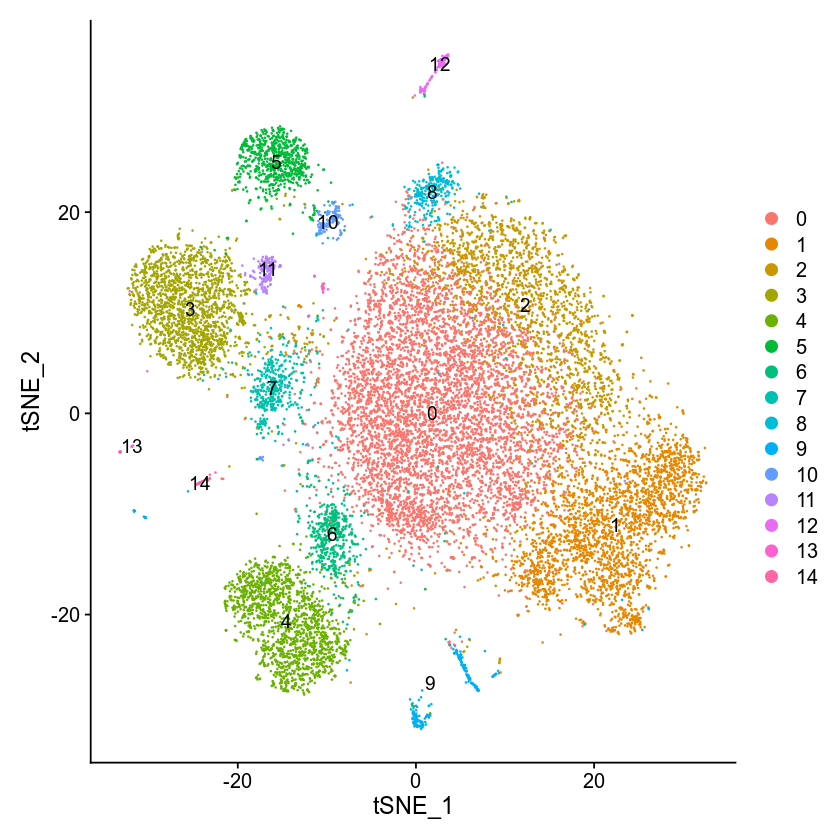

In [22]:
DimPlot(pbmc, label=TRUE)

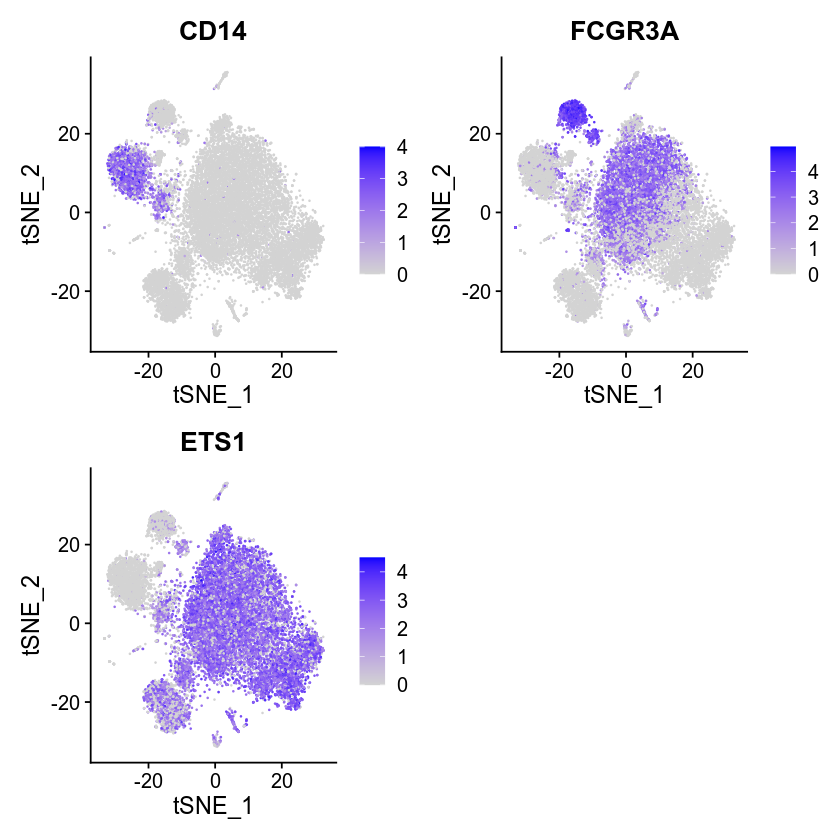

In [23]:
FeaturePlot(pbmc, features=c('CD14', 'FCGR3A', 'ETS1')) # cd14: 3,7 cd16: 5, 10